# Exploratory Data Analysis

&lt; Work in progress &gt;

__TODO / MISSING__:
* Add hour of day to comments for further exploration
* Add day of week to comments
* Class distribution: use histograms instead of size()
* Scatter plots
* Violin plots


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Not necessary, but I like the ggplot style better
plt.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df_art = pd.read_csv('articles_2017_08.csv')
df_com = pd.read_csv('comments_2017_08.csv')
# Make float better readable
pd.options.display.float_format = '{:.0f}'.format

### First Look

In [3]:
df_art.head(3)

,tId,article_id,updated,num_comments,link,header,sub,text
0,30600370,30600370,1502015309,12,/leben/reisen/story/Fuenf-Gruende-fuer-eine-Re...,Fünf Gründe für eine Reise nach Alabama,Sweet Home Alabama! Der Staat im Südosten der ...,"Feinste Sandstrände, kilometerlange Maisfelder..."
1,11684042,11684042,1502015306,4,/ausland/news/story/Lopez-aus-Gefaengnis-in-Ha...,Lopez aus Gefängnis in Hausarrest entlassen,Vier Tage nach seiner Festnahme befindet sich ...,Vier Tage nach seiner Festnahme ist der venezo...
2,29297244,29297244,1502015324,39,/sport/weitere/story/29297244,Buhmann Gatlin holt Gold – Bolt wird gefeiert,Usain Bolt muss auf seine 12. WM-Goldmedaille ...,(sr/fal/sda)


In [4]:
df_com.head(3)

,tId,cId,mob,vup,vdo,tit,aut,time,con
0,30284249,329_485,1,5,2,@Rebby,Störenfried,am 06.08.2017 08:59,"Wäre doch machbar, Störsender in Autos einzub..."
1,25420673,1_37,1,0,0,@T. Paul,Papa Bär,am 05.08.2017 22:02,Hier. Aber ich bin ja nur ein Papa Bär. Hüte ...
2,30284249,47_47,1,39,7,Das liebe Handy...,Heinz,am 05.08.2017 19:00,Und dazu brauchts ne Studie? Legt im allgemei...


In [5]:
print(df_art.shape)
print(df_com.shape)

(21, 8)
(1307, 9)


In [6]:
print(df_art.dtypes)
print(' ')
print(df_com.dtypes)

tId               int64
article_id        int64
updated         float64
num_comments      int64
link             object
header           object
sub              object
text             object
dtype: object
 
tId      int64
cId     object
mob      int64
vup      int64
vdo      int64
tit     object
aut     object
time    object
con     object
dtype: object


In [7]:
df_art.describe()

# Summary:
# No missing attributes since count is the same everywhere
# No negative values, chi^2 etc. can be used

,tId,article_id,updated,num_comments
count,21,21,21,21
mean,21993259,21993259,1502015317,63
std,6324191,6324191,8,95
min,11684042,11684042,1502015306,0
25%,15904700,15904700,1502015309,6
50%,22101669,22101669,1502015316,16
75%,26624359,26624359,1502015325,39
max,30715052,30715052,1502015328,296


In [8]:
df_com.describe()

# Summary:
# No missing attributes 
# No negative values

,tId,mob,vup,vdo
count,1307,1307,1307,1307
mean,19864521,1,40,19
std,6589672,0,69,36
min,11684042,0,0,0
25%,13942829,0,8,3
50%,19423348,1,22,8
75%,25420673,1,46,18
max,30715052,1,969,316


In [9]:
print(df_art.skew())
# Makes only sense on 'num_comments'

tId            -0
article_id     -0
updated         0
num_comments    2
dtype: float64


In [10]:
print(df_com.skew())
# Skew is not high enough that it has to be corrected

tId    0
cId    1
mob   -1
vup    7
vdo    4
dtype: float64


### Feature Engineering
To make further analysis possible concerning time features.

In [11]:
from datetime import datetime

def get_dt_obj(time):
    time = time.replace('am ', '')
    # Make datetime object from string
    return datetime.strptime(time, '%d.%m.%Y %H:%M')

def get_hour_of_day(time):
    return get_dt_obj(time).hour

def get_weekday(time):
    return get_dt_obj(time).weekday()

# Basically same as "the hour of week" or "weekday_hourOfDay"
def get_weekday_float(time):
    hour = float(get_hour_of_day(time))
    weekday = get_weekday(time)
    return float(weekday) + hour / 24

df_com['hour'] = df_com['time'].apply(get_hour_of_day)
df_com['weekday'] = df_com['time'].apply(get_weekday) # 0 = Monday
df_com['weekday_fl'] = df_com['time'].apply(get_weekday_float)
df_com['score'] = df_com['vup'] - df_com['vdo']

### Class Distribution

In [12]:
# 'df_art' has no classes

# 'df_com' 
print(df_com.groupby('mob').size())
print(df_com.groupby('hour').size())
print(df_com.groupby('weekday').size())

mob
0    334
1    973
dtype: int64
hour
0      33
1      26
2      12
3       7
4      15
5      29
6      58
7      62
8      74
9      63
10     60
11     33
12     55
13     13
14     15
15     18
16     31
17     32
18     67
19    149
20    108
21     87
22    130
23    130
dtype: int64
weekday
0     82
1      2
2    102
3    311
4     84
5    300
6    426
dtype: int64


### Correlation
Let's find relations between some of the attributes. Correlation requires continuous data.

In [13]:
# Only for these columns
cols = ['hour', 'weekday', 'weekday_fl', 'mob', 'vup', 'vdo']
df = df_com[cols]

# Change back how float is displayed
pd.options.display.float_format = '{:.4f}'.format

# Get pearson co-efficients
df_corr = df.corr()
df_corr

# Summary:
# Correlations are low.
# The only interesting correlation is between 'vup' and 'vdo'.

,hour,weekday,weekday_fl,mob,vup,vdo
hour,1.0000,0.1547,0.3063,0.0045,0.1775,0.1863
weekday,0.1547,1.0000,0.9879,-0.0820,0.1056,0.1118
weekday_fl,0.3063,0.9879,1.0000,-0.0783,0.1297,0.1370
mob,0.0045,-0.0820,-0.0783,1.0000,0.0309,0.0959
vup,0.1775,0.1056,0.1297,0.0309,1.0000,0.2797
vdo,0.1863,0.1118,0.1370,0.0959,0.2797,1.0000


### Scatter plot

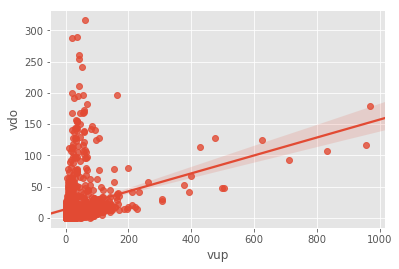

In [14]:
#sns.pairplot(df_com, x_vars='vup', y_vars='vdo', size=6)
sns.regplot(x='vup', y='vdo', data=df_com)
plt.show()

# Quite some outliers

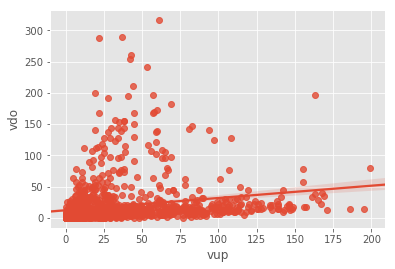

In [15]:
sns.regplot(x='vup', y='vdo', data=df_com[df_com['vup'] < 200])
plt.show()


### Prediction
Ok... I want to know:
* How to get the best score/consensus (upvotes - downvotes)?
* How to be most controversial (upvotes + downvotes)?
* Which articles go most score / were most controversial (sum over all comments)?

Impact will be taken into account from:
* Hour of comment
* Weekday
* Weekday + hour = Hour of week
* text written
* title written / if title is an answer (starts with "@")
* if from mobile (makes no sense, but let's see what happens)
* article text
* article category
* ...?

Empty DataFrame
Columns: [tId, cId, mob, vup, vdo, tit, aut, time, con, hour, weekday, weekday_fl, score, contr, article_id, updated, num_comments, link, header, sub, text]
Index: []

[0 rows x 21 columns]


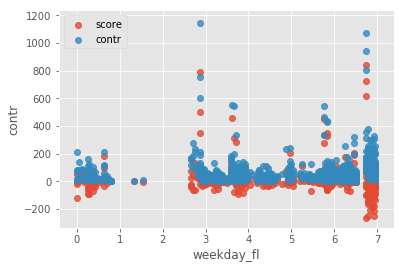

In [16]:
df_com['score'] = df_com['vup'] - df_com['vdo']
df_com['contr'] = df_com['vup'] + df_com['vdo']
df_com['tit'] = df_com['tit'].str.lower()
df_com['con'] = df_com['con'].str.lower()
# Left inner join
df_merge = pd.merge(left=df_com, right=df_art, left_on='tId', right_on='tId')

# is empty: (= all comments correspond to an article)
print(df_merge[pd.isnull(df_merge['text'])])
#print(df_com.shape)
#print(df_merge.shape)

f, ax = plt.subplots()
sns.regplot(x='weekday_fl', y='score', data=df_com, fit_reg=False)
sns.regplot(x='weekday_fl', y='contr', data=df_com, fit_reg=False)
ax.legend(labels=['score', 'contr'])
plt.show()


In [43]:
# TODO make test set

# Prepare data for X and y
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=5, ngram_range=(1, 2)) # Range higher than 1 doesn't help
X_train_counts = vect.fit_transform(df_merge['con'])

y_scaler = StandardScaler()
def classify(val):
    if val > 100: return 2
    if val > 0: return 1
    return 0

y_train = df_merge['score'].apply(classify)
#y_train = y_scaler.fit_transform(df_merge['score'][:, None])
#y_test = y.scaler.transform(y_test)

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Get best parameter
if False:
    from sklearn.model_selection import GridSearchCV
    param_grid = {'C': np.logspace(-3, 1, 5)}#, 'gamma': np.logspace(-2, 1, 4)}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid.fit(X_train_counts, y_train)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
else:
# Run only with one parameter
    scores = cross_val_score(LogisticRegression(C=1e-3), X_train_counts, y_train, cv=5)
    print(np.mean(scores))
    scores.coef_

# Summary so far:
# For prediction of "score":
# With comment content: 0.69
# With article text: 0.62
# With article header + subtitle: 0.62

# Learned:
# Used logistic regression, which is for classes, duuh

0.686308519038


AttributeError: 'numpy.ndarray' object has no attribute 'coef_'

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
y_train = df_merge['score']
grid.fit(df_merge['con'], y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("best params: ", grid.best_params_)


Best cross-validation score: 0.04
best params:  {'logisticregression__C': 0.001}


In [47]:
feature_names = vect.get_feature_names()
#feature_names[::300]
print(len(feature_names))
print(len(grid.best_estimator_.named_steps["logisticregression"].coef_))
coef = list(zip(feature_names, grid.best_estimator_.named_steps["logisticregression"].coef_))
#print(coef)
# TODO test model with test set

1433
240
